In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import datetime
%matplotlib inline

In [22]:
data = pd.read_csv('AirPassengers.csv')

In [3]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
set(data.Month)

{'1949-01',
 '1949-02',
 '1949-03',
 '1949-04',
 '1949-05',
 '1949-06',
 '1949-07',
 '1949-08',
 '1949-09',
 '1949-10',
 '1949-11',
 '1949-12',
 '1950-01',
 '1950-02',
 '1950-03',
 '1950-04',
 '1950-05',
 '1950-06',
 '1950-07',
 '1950-08',
 '1950-09',
 '1950-10',
 '1950-11',
 '1950-12',
 '1951-01',
 '1951-02',
 '1951-03',
 '1951-04',
 '1951-05',
 '1951-06',
 '1951-07',
 '1951-08',
 '1951-09',
 '1951-10',
 '1951-11',
 '1951-12',
 '1952-01',
 '1952-02',
 '1952-03',
 '1952-04',
 '1952-05',
 '1952-06',
 '1952-07',
 '1952-08',
 '1952-09',
 '1952-10',
 '1952-11',
 '1952-12',
 '1953-01',
 '1953-02',
 '1953-03',
 '1953-04',
 '1953-05',
 '1953-06',
 '1953-07',
 '1953-08',
 '1953-09',
 '1953-10',
 '1953-11',
 '1953-12',
 '1954-01',
 '1954-02',
 '1954-03',
 '1954-04',
 '1954-05',
 '1954-06',
 '1954-07',
 '1954-08',
 '1954-09',
 '1954-10',
 '1954-11',
 '1954-12',
 '1955-01',
 '1955-02',
 '1955-03',
 '1955-04',
 '1955-05',
 '1955-06',
 '1955-07',
 '1955-08',
 '1955-09',
 '1955-10',
 '1955-11',
 '19

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [7]:
dateparse

<function __main__.<lambda>>

In [8]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [9]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
ts = data.Passengers

In [12]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [13]:
ts.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64

In [14]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: Passengers, dtype: int64

In [15]:
#let's check the Stationarity in three ways 
#1.means
#2.variance
#3.covariance

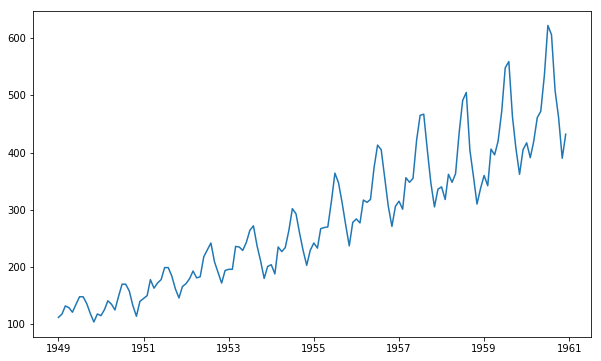

In [16]:
#Main data seriesw
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.show()

In [17]:
rool_means = pd.rolling_mean(ts, window=12)

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


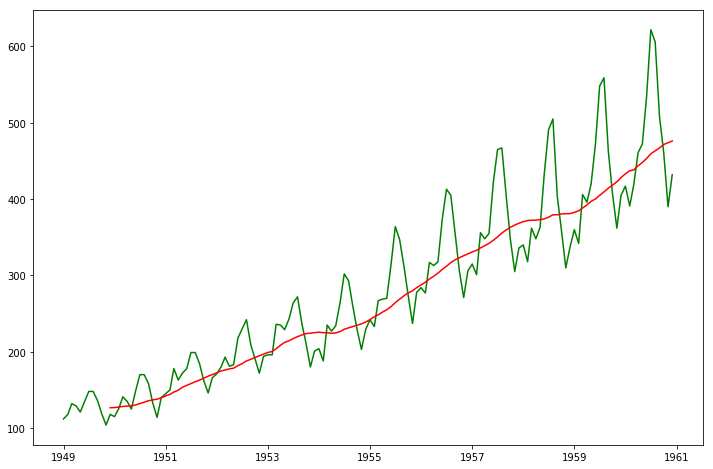

In [18]:
#1.means
plt.figure(figsize=(12, 8))
plt.plot(ts, color='green', label='series')
plt.plot(rool_means, color='red', label='Mean')
plt.show()

In [33]:
#Here mean is incresing.so, this time series is not Stationarity
# Now we convert to canstant mean using log 
def Stationarity_plot(real_ts):
    real_mean = pd.rolling_mean(real_ts, window=15)
    std = pd.rolling_std(real_ts, window=15)
    plt.figure(figsize=(12, 7))
    plt.plot(real_ts, color='blue', label='series')
    plt.plot(real_mean, color='red', label='mean')
    plt.plot(std, color='green', label='std')
    plt.legend()
    plt.show()

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  after removing the cwd from sys.path.
/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).std()
  """


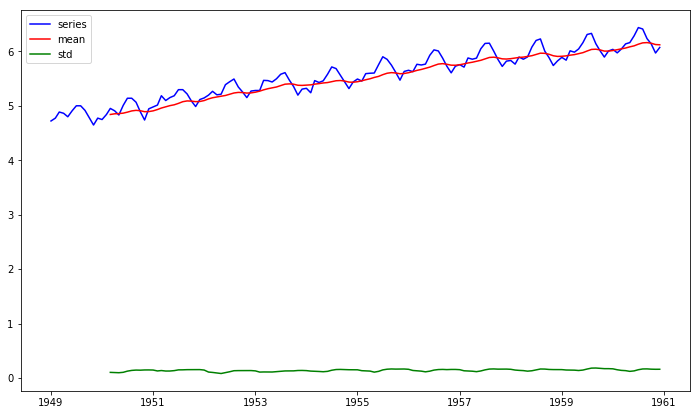

In [34]:
#now plot constant mean with log function 
Stationarity_plot(np.log(ts))

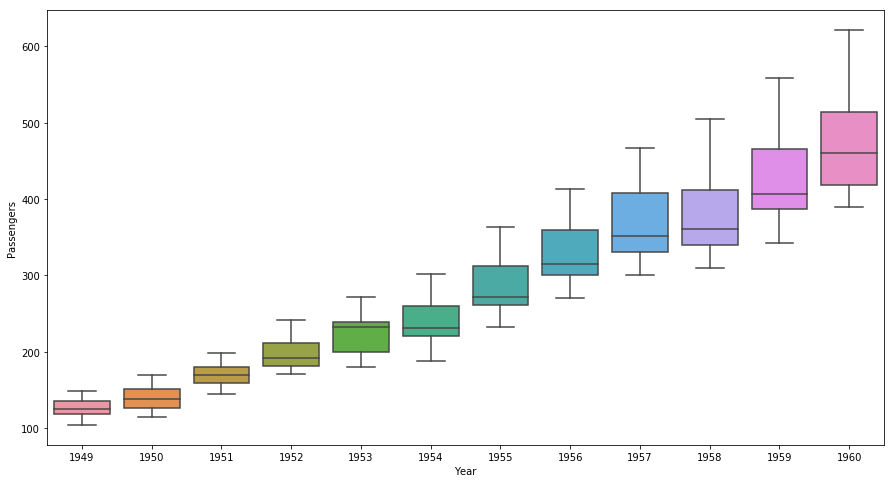

In [23]:
#boxplot with year
plt.figure(figsize=(15, 8))
sb.boxplot(ts.index.year, ts)
plt.xlabel('Year')
plt.show()

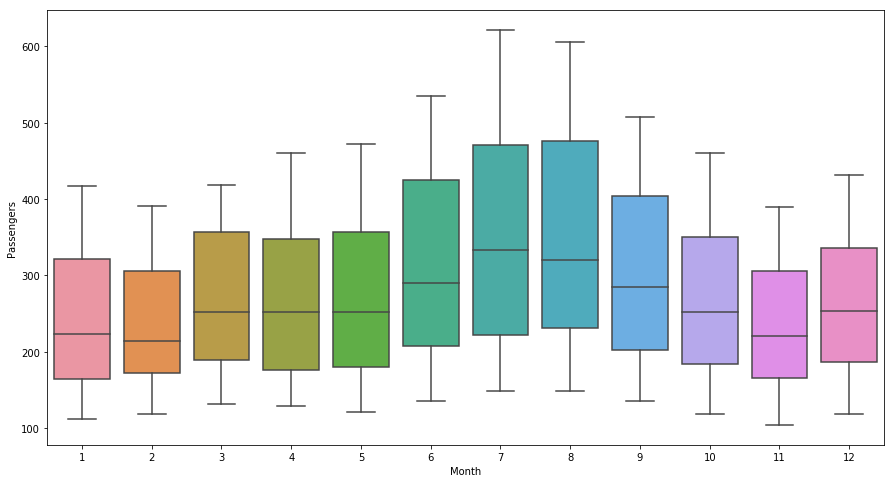

In [24]:
#boxplot with month
plt.figure(figsize=(15, 8))
sb.boxplot(ts.index.month, ts)
plt.show()

[ARIMA](http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/)

In [27]:
#differencitate
log_mean_diff = real_ts-real_mean
log_mean_diff.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: Passengers, dtype: float64

In [28]:
log_mean_diff.dropna(inplace=True)
log_mean_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: Passengers, dtype: float64

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  after removing the cwd from sys.path.
/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).std()
  """


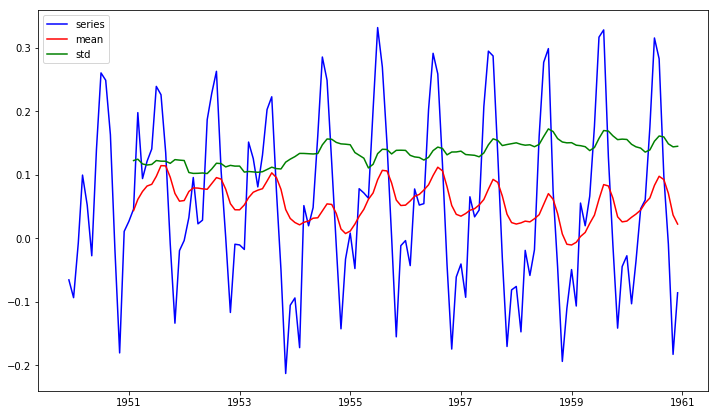

In [35]:
#plot difference
Stationarity_plot(log_mean_diff)

In [124]:
#diffrenciate another ways
log_mean_diff_1 = real_ts-real_ts.shift()
log_mean_diff_1.dropna(inplace=True)
log_mean_diff_1.head()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
Name: Passengers, dtype: float64

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  after removing the cwd from sys.path.
/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).std()
  """


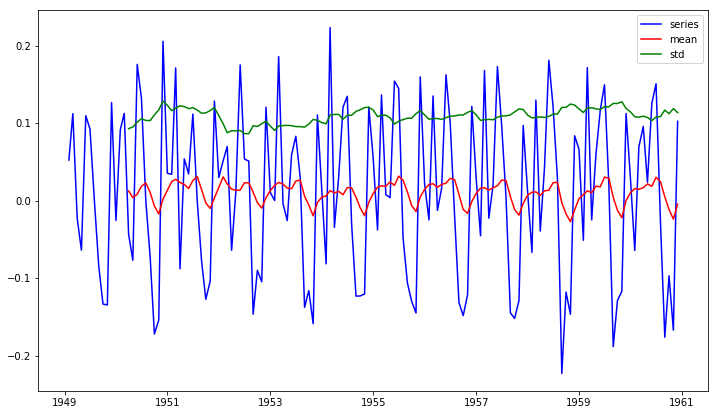

In [125]:
#plot
Stationarity_plot(log_mean_diff_1)

## Forecasting a Time Series

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


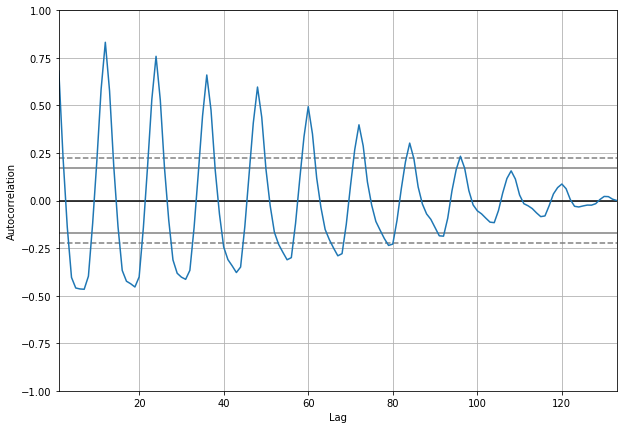

In [128]:
# now autocorrelation plot to find p value
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(10, 7))
autocorrelation_plot(log_mean_diff)
plt.show()

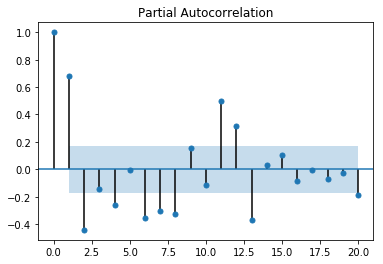

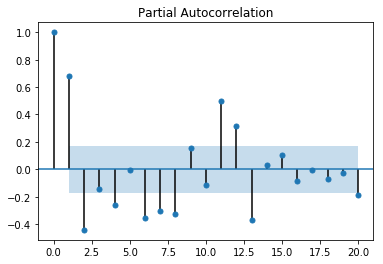

In [129]:
#plot acf and pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(log_mean_diff, lags=20)

#### Hence p = 1 or 2 ,  q = 1 and d = 1

## Let's train the model with ARIMA
More information about ARIMA [click here](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)

In [58]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(real_ts, order=(2, 1, 1))
model_fit = model.fit(disp=0)

In [60]:
model_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 -255.3370 
Dependent Variable: D.Passengers     Log-Likelihood:      140.08    
Date:               2018-04-26 18:33 Scale:               1.0000    
No. Observations:   143              Method:              css-mle   
Df Model:           4                Sample:              02-01-1949
Df Residuals:       139                                   12-01-1960
Converged:          1.0000           S.D. of innovations: 0.090     
AIC:                -270.1512        HQIC:                -264.131  
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                0.0101   0.0004  23.5101 0.0000  0.0092  0.0109
ar.L1.D.Passengers   0.9982   0.0758  13.1609 0.0000  0.8495  1.1468
ar.L2.D.Passengers  -0.4134   0.0768  -5.3831 0.0000 -0.5639 -0.2629
ma.L1.D.Passengers  -1.0000   0.0284 -35.2684 0.0000 -1.0555 -0.9444
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.2073            -0.9805           1.5553            -0.1086
AR.2            1.2073             0.9805           1.5553             0.1086
MA.1            1.0000             0.0000           1.0000             0.0000
====================================================================

"""

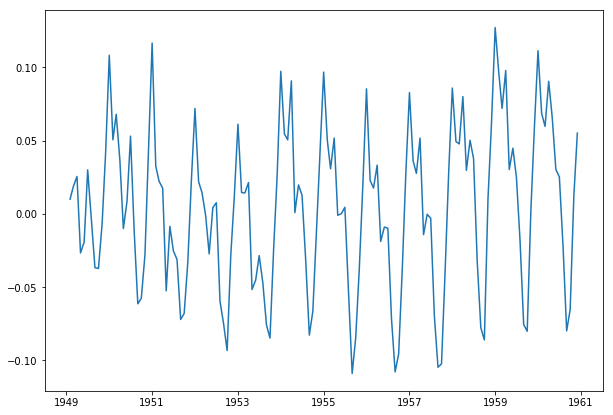

In [130]:
plt.figure(figsize=(10, 7))
plt.plot(model_fit.fittedvalues)

In [131]:
pred = model_fit.predict(start=144, end=280, typ='levels')

In [132]:
pred_1 = model_fit.predict(start=pd.to_datetime('1960-01-01'), end=pd.to_datetime('1971-01-01'), dynamic=True)

In [133]:
pred_re = np.exp(pred)

In [134]:
pred_re_1 = np.exp(pred_1)

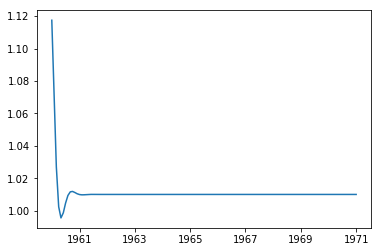

In [116]:
plt.plot(pred_re)

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sm = SARIMAX(real_ts, order=(2,1,1))
model_sm_fit = model_sm.fit(disp=0)

In [89]:
model_sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 129.732
Date:                Thu, 26 Apr 2018   AIC                           -251.464
Time:                        19:47:26   BIC                           -239.584
Sample:                    01-01-1949   HQIC                          -246.636
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9793      0.100      9.839      0.000       0.784       1.174
ar.L2         -0.3740      0.118     -3.178      0.001      -0.605      -0.143
ma.L1         -0.8303      0.102     -8.118      0.000      -1.031      -0.630
sigma2         0.0095      0.002      6.134      0.000       0.006       0.013
===================================================================================
Ljung-Box (Q):                      365.25   Jarque-Bera (JB):                 8.63
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.14   Skew:                             0.22
Prob(H) (two-sided):                  0.66   Kurtosis:                         1.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

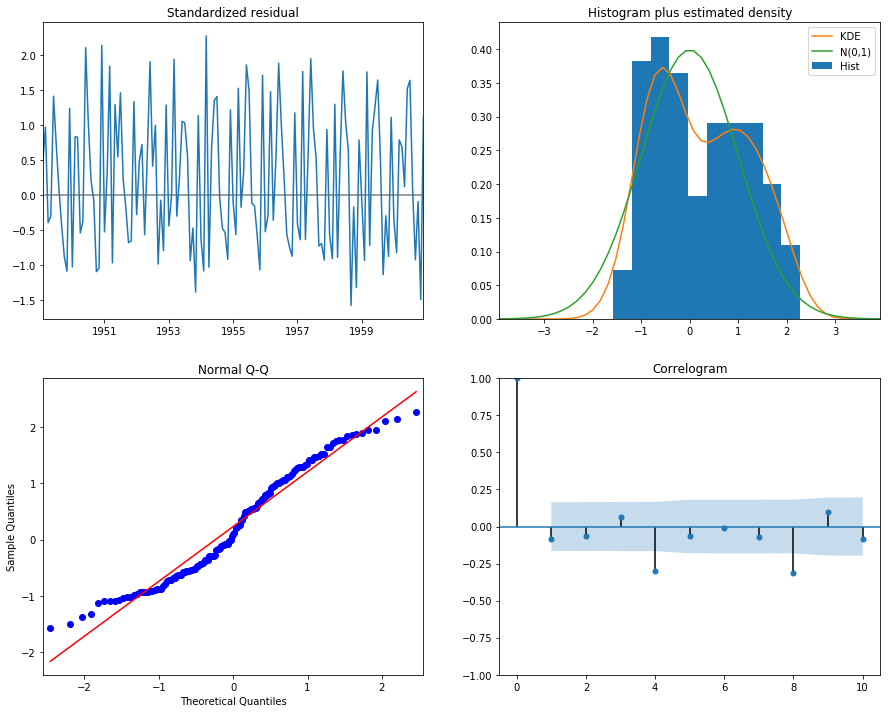

In [90]:
model_sm_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [109]:
pred_2 = model_sm_fit.get_prediction(start=pd.to_datetime('1960-01-01'), end=pd.to_datetime('1971-01-01'), dynamic=True)

In [110]:
pred_ci =  pred_2.conf_int()

In [111]:
pred_ci

,lower Passengers,upper Passengers
1960-01-01,5.876858,6.258958
1960-02-01,5.797623,6.379624
1960-03-01,5.744927,6.425007
1960-04-01,5.712176,6.435102
1960-05-01,5.692204,6.435623
1960-06-01,5.680113,6.437139
1960-07-01,5.672161,6.442011
1960-08-01,5.665542,6.449568
1960-09-01,5.658712,6.458468
1960-10-01,5.651241,6.467616


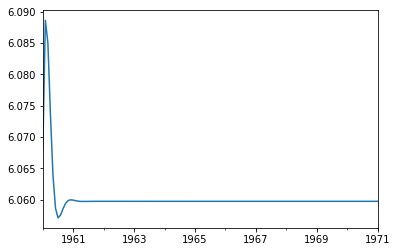

In [112]:
pred_2.predicted_mean.plot()

In [113]:
pred_2.predicted_mean

1960-01-01    6.067908
1960-02-01    6.088624
1960-03-01    6.084967
1960-04-01    6.073639
1960-05-01    6.063914
1960-06-01    6.058626
1960-07-01    6.057086
1960-08-01    6.057555
1960-09-01    6.058590
1960-10-01    6.059428
1960-11-01    6.059862
1960-12-01    6.059974
1961-01-01    6.059920
1961-02-01    6.059827
1961-03-01    6.059755
1961-04-01    6.059719
1961-05-01    6.059712
1961-06-01    6.059717
1961-07-01    6.059726
1961-08-01    6.059732
1961-09-01    6.059735
1961-10-01    6.059735
1961-11-01    6.059735
1961-12-01    6.059734
1962-01-01    6.059733
1962-02-01    6.059733
1962-03-01    6.059733
1962-04-01    6.059733
1962-05-01    6.059733
1962-06-01    6.059733
                ...   
1968-08-01    6.059733
1968-09-01    6.059733
1968-10-01    6.059733
1968-11-01    6.059733
1968-12-01    6.059733
1969-01-01    6.059733
1969-02-01    6.059733
1969-03-01    6.059733
1969-04-01    6.059733
1969-05-01    6.059733
1969-06-01    6.059733
1969-07-01    6.059733
1969-08-01 